In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
def generate_fringepattern(wv, gr, t_idx, t_res, init_thk):
    '''
    wv : wavelength (nm)
    gr : growth rate (nm / sec)
    t_idx : number of time array index
    t_res : time resolution (sec)
    init_thk : initial thickness 
    '''
    time_array = np.array(range(t_idx)) * t_res 
    thickness = init_thk + time_array * gr 

    pattern = np.cos( 2 * np.pi * (thickness)*2 / wv )
    # np.cos(x) -> period is 2pi (constructive at every 2n pi )
    # np.cos(x * 2pi) -> period is integer x 
    # np.cos(x * 2pi * thickenss*2 / wavelength) 

    return time_array, pattern    

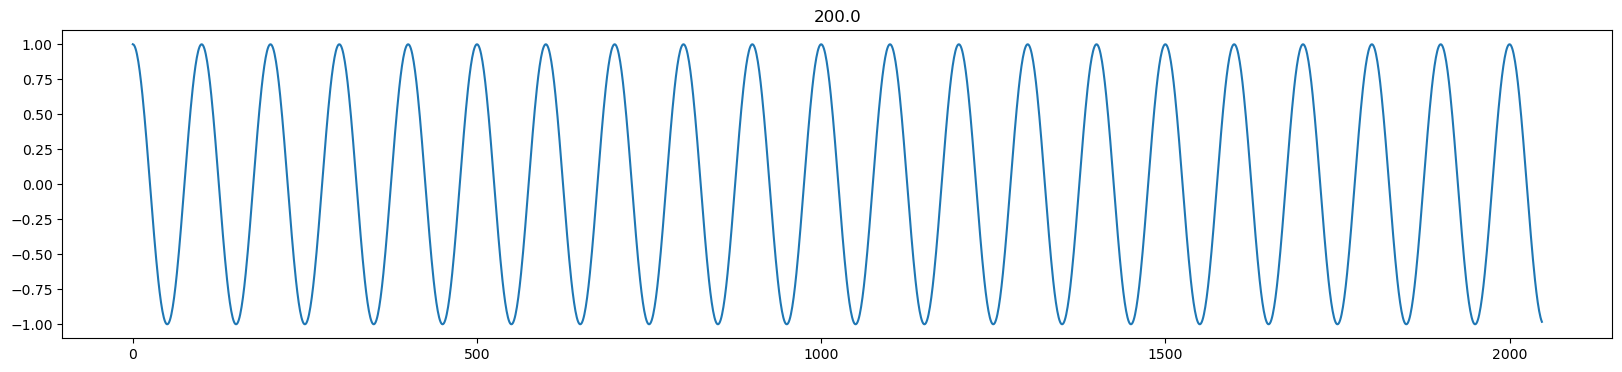

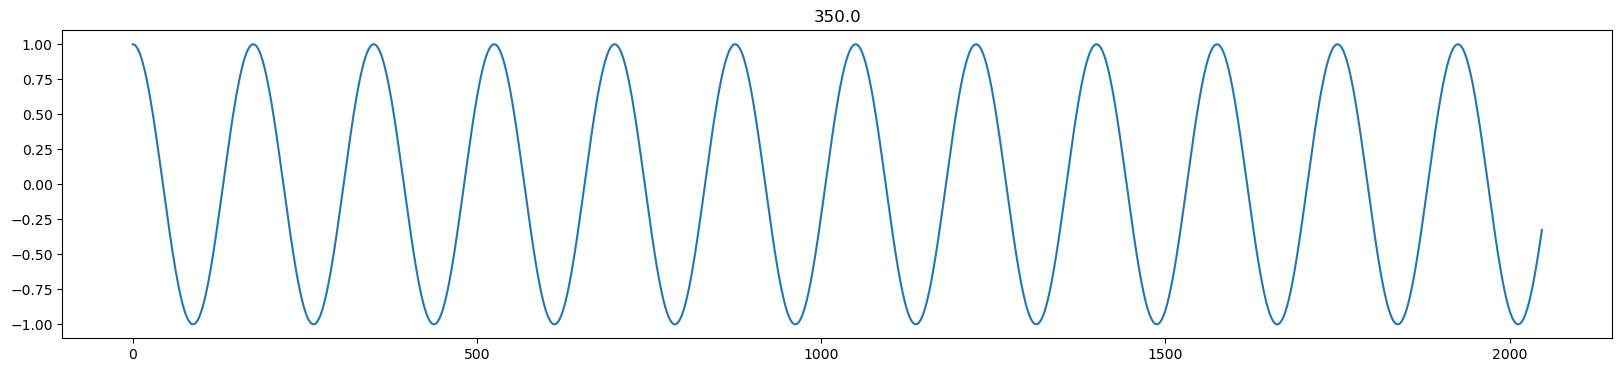

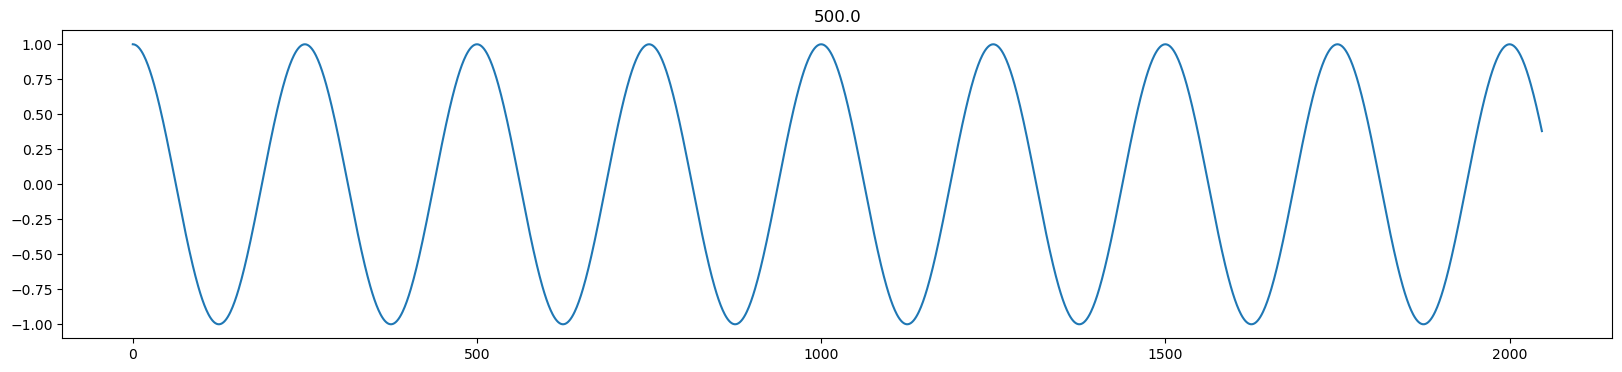

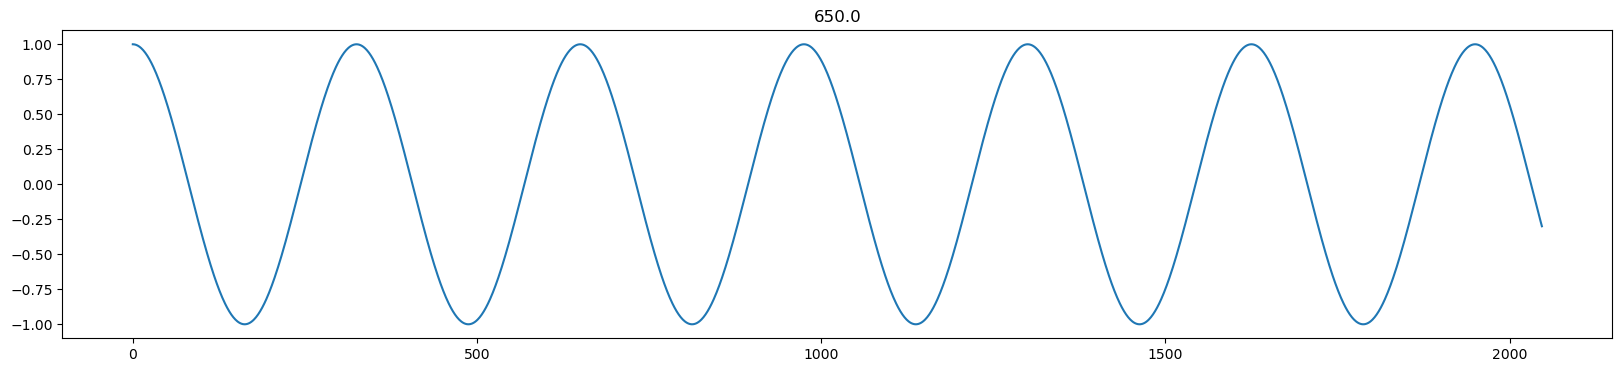

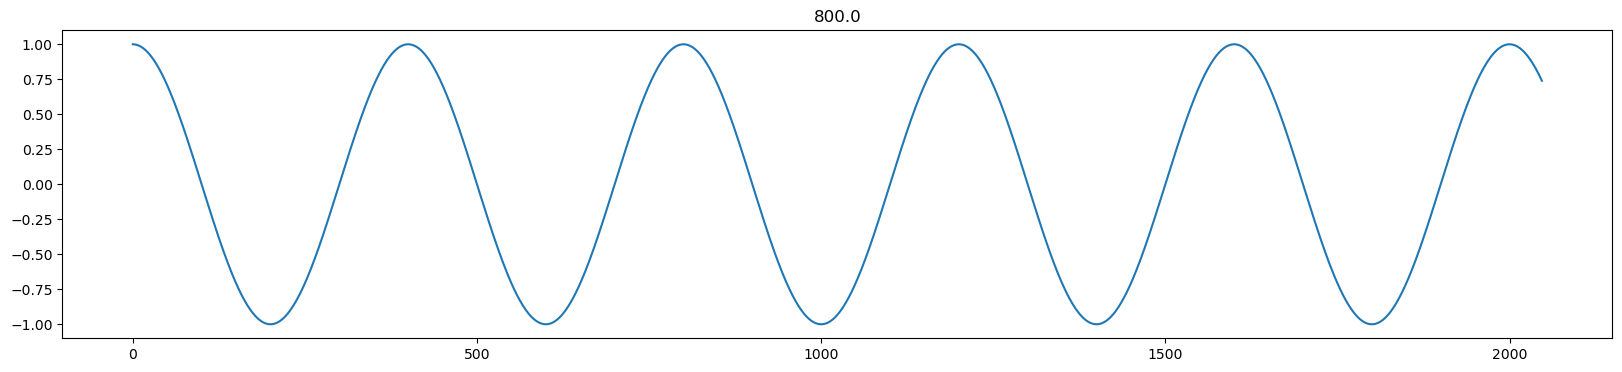

In [4]:
nrow, ncol = 2048, 1201
growth_rate = 1 
for wavelength in np.linspace(200, 800, 5) :
    plt.figure(figsize=(20, 4))
    result = generate_fringepattern(wavelength, growth_rate, nrow, 1, 0)
    plt.plot( result[0], result[1])
    plt.title(wavelength)
    plt.show()
    plt.close()

Text(0.5, 1.0, 'growth_rate:8.123184811627365')

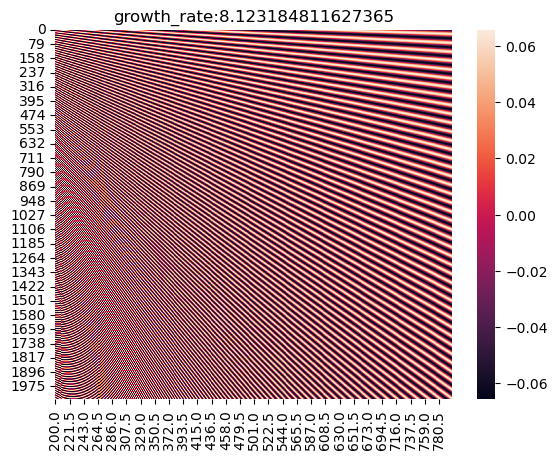

In [22]:
nrow, ncol = 2048, 1201
growth_rate = np.random.uniform(0, 10)
initial_thickness = np.random.uniform(0, 800)
amplitude = np.abs(np.random.normal(0, 0.1))
df = np.empty( (ncol, nrow))
for i, wavelength in enumerate(np.linspace(200, 800, ncol)) :
    df[i] = amplitude* generate_fringepattern(wavelength, growth_rate, nrow, 1, initial_thickness)[1]
df = pd.DataFrame(df.T, columns= np.linspace(200, 800, ncol))
df.index = generate_fringepattern(wavelength, growth_rate, nrow, 1, initial_thickness)[0]
sns.heatmap(df)
plt.title(f"growth_rate:{growth_rate}")

In [66]:
#prepare summary table 

summary_file = "./summary.csv"
if os.path.exists(summary_file):
    print("summary file loaded.. done")
    summary = pd.read_csv(summary_file)
else :
    print("no file exist, make new data frame")
    summary = pd.DataFrame(columns=["file_name", "growth_rate", "amplitude_type", "amplitude", "masked", "noise"])

no file exist, make new data frame


In [67]:
#simple pattern generation
for ifile in range(1000):
    index = len(summary)
    nrow, ncol = 2048, 1201
    growth_rate = np.random.uniform(0, 10)
    initial_thickness = np.random.uniform(0, 800)
    amplitude = np.abs(np.random.normal(0, 0.1))
    df = np.empty( (ncol, nrow))
    for i, wavelength in enumerate(np.linspace(200, 800, ncol)) :
        df[i] = amplitude* generate_fringepattern(wavelength, growth_rate, nrow, 1, initial_thickness)[1]
    df = pd.DataFrame(df.T, columns= np.linspace(200, 800, ncol))

    filename = f"./ToyMC/01_simplepattern/simple_fringe_pattern_{index}.csv"
    df.to_csv(filename)
    summary.loc[index] = [filename, growth_rate, "plain", amplitude, "no", "no"]

#update summary file
summary.to_csv(summary_file)

In [68]:
#simple pattern generation with noise in intensity 
for ifile in range(1000):
    index = len(summary)
    nrow, ncol = 2048, 1201
    growth_rate = np.random.uniform(0, 10)
    initial_thickness = np.random.uniform(0, 800)
    amplitude = np.abs(np.random.normal(0, 0.1))
    noise_level = np.random.uniform(0, 0.5)
    df = np.empty( (ncol, nrow))
    for i, wavelength in enumerate(np.linspace(200, 800, ncol)) :
        df[i] = amplitude* generate_fringepattern(wavelength, growth_rate, nrow, 1, initial_thickness)[1] + np.random.normal(0, noise_level, nrow)
    df = pd.DataFrame(df.T, columns= np.linspace(200, 800, ncol))

    # sns.heatmap(df)
    # plt.title(f"{amplitude} and {noise_level}")
    # plt.show()
    # plt.close()
    filename = f"./ToyMC/02_simple_noise/simple_fringe_pattern_w_noise_{index}.csv"
    df.to_csv(filename)
    summary.loc[index] = [filename, growth_rate, "plain", amplitude, "no", noise_level]

#update summary file
summary.to_csv(summary_file)

In [51]:
noise_level

0.17237809270119775

<Axes: >

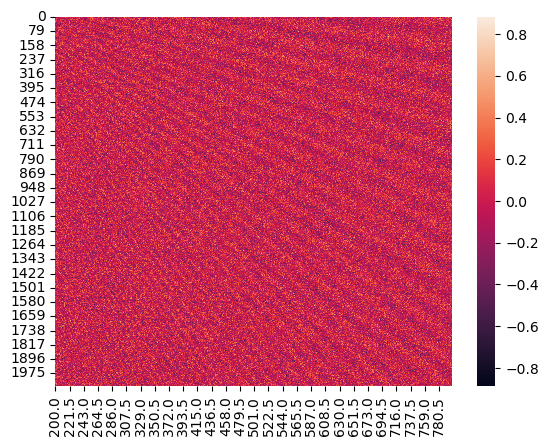

In [52]:
sns.heatmap(df)

In [33]:
summary

,file_name,growth_rate,amplitude_type,amplitude,masked,noise
0,./ToyMC/01_simplepattern/simple_fringe_pattern...,2.241726,plain,0.091147,no,no
1,./ToyMC/01_simplepattern/simple_fringe_pattern...,7.292200,plain,0.070505,no,no
2,./ToyMC/01_simplepattern/simple_fringe_pattern...,1.419505,plain,0.044897,no,no
3,./ToyMC/01_simplepattern/simple_fringe_pattern...,5.103763,plain,0.102920,no,no
4,./ToyMC/01_simplepattern/simple_fringe_pattern...,2.882574,plain,0.120270,no,no
5,./ToyMC/01_simplepattern/simple_fringe_pattern...,2.944030,plain,0.049179,no,no
6,./ToyMC/01_simplepattern/simple_fringe_pattern...,8.443984,plain,0.166526,no,no
7,./ToyMC/01_simplepattern/simple_fringe_pattern...,3.908975,plain,0.020949,no,no
8,./ToyMC/01_simplepattern/simple_fringe_pattern...,5.915031,plain,0.089379,no,no
9,./ToyMC/01_simplepattern/simple_fringe_pattern...,5.395905,plain,0.033270,no,no


In [ ]:

#simple pattern generation with decay amplitudes

#simple pattern generation with flat OES signal

#simple pattern generation with smoothed OES signal
